# ALGORITMO DE IA-1: REGRESSÃO LINEAR 

ENUNCIADO:   
A regressão linear consiste em encontrar a reta que melhor se ajusta aos seus dados. Em geral, para definir este ajuste, usa-se a reta com a menor distância dela até os seus dados. Esse algoritmo é simples e intuitivo, mas muito usados em problemas de predição de preços. 
Seu desafio nesta etapa é implementar uma regressão linear em um dos datasets recomendados. 


## CASO 02: DATASET BOSTON HOUSING 

1) Importar livrarías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
%matplotlib inline

2) Importar e formatar o dataset

In [3]:
#importar dataset
data = load_boston()

#gerar um dataframe único que contenha a matriz de caraterísticas e as saídas
dataset = pd.concat([pd.DataFrame(data['data']), pd.DataFrame(data['target'])], axis=1)

#agregar os metadados ao dataframe
dataset.columns = np.concatenate((data['feature_names'], ['PRICE']))
print('População do dataset: ', len(dataset))
dataset.head(20)


População do dataset:  506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


3) Definir variáveis dependente e independente:
- Variáveis independentes: CRIM, ZN, ..., LSTAT
- Variável dependente: PRICE

In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

4) ANÁLISE EXPLORATÓRIO:  
Nesta parte, verificamos a correlação existente entre as variáveis (nível de dependência ente elas).    
A matriz de correlação gera valores entre [-1, 1], no qual identificamos os seguintes comportamentos:   
- Valores próximos a -1 indicam uma correlação negativa entre as variáveis  
- Valores próximos a 0 indicam que não existe correlação entre as variáveis  
- Valores próximos a 1 indicam uma correlação positiva entre as variáveis  

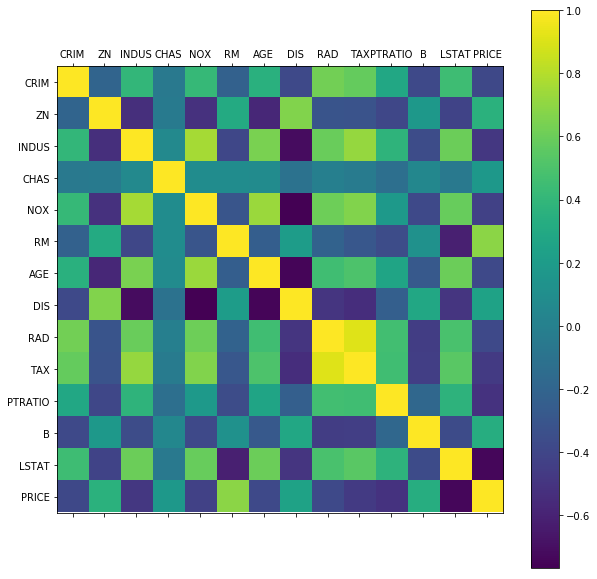

In [5]:
#função para gerar a matriz de correlação
def plot_correlation(dataset):
    plt.figure(figsize = (10, 10))
    plt.matshow(dataset.corr(), fignum = 1)
    plt.xticks(range(len(dataset.columns)), dataset.columns)
    plt.yticks(range(len(dataset.columns)), dataset.columns)
    plt.colorbar()
    plt.show()

#plotar a matriz de correlação    
plot_correlation(dataset)

Comentários:  
- A variável RM possui uma alta correlação positiva com a variável dependente PRICE
- A variável LSTAT possui uma alta correlação negativa com a variável dependente PRICE

5) FASE DE PREPROCESSAMENTO:

In [6]:
#sampling: dividir o dataset em conjunto de treinamento/teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#verificando a divisão do dataset:
print('#Amostras no conjunto de treinamento: ', len(x_train))
print('#Amostras no conjunto de teste: ', len(x_test))

#Amostras no conjunto de treinamento:  354
#Amostras no conjunto de teste:  152


In [7]:
#standarização: x_std = (x-ux)/sigma(x)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

6) FASE DE APRENDIZADO:
Serão utilizados 3 variantes da Regressão Linear:  
- Modelo de Regressão Linear Múltipla
- Modelo de Regressão Linear LASSO
- Modelo de Regressão Linear RIDGE

6.1- Modelo de Regressão Linear Múltipla

In [8]:
#fase de treinamento
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
from termcolor import colored

#predição de valores
y_pred_lr = regressor.predict(x_test)

#função para mostrar resultados: y_test vs. y_pred_lr
def print_predictions(y_true, y_pred):
    print('\t y_true \t\t y_pred')
    for i in range(len(y_true)):
        print('\t', round(y_true[i], 4), '\t \t', round(y_pred[i], 4))    
        
#mostrar resultados 
print_predictions(y_test, y_pred_lr)

	 y_true 		 y_pred
	 22.6 	 	 24.9355
	 50.0 	 	 23.7567
	 23.0 	 	 29.3364
	 8.3 	 	 11.999
	 21.2 	 	 21.3758
	 19.9 	 	 19.1972
	 20.6 	 	 20.5702
	 18.7 	 	 21.2138
	 16.1 	 	 19.0519
	 18.6 	 	 20.3103
	 8.8 	 	 5.4769
	 17.2 	 	 16.8842
	 14.9 	 	 17.1318
	 10.5 	 	 5.4113
	 50.0 	 	 40.216
	 29.0 	 	 32.3092
	 23.0 	 	 22.4645
	 33.3 	 	 36.5057
	 29.4 	 	 31.0391
	 21.0 	 	 23.1755
	 23.8 	 	 24.7511
	 19.1 	 	 24.5112
	 20.4 	 	 20.6568
	 29.1 	 	 30.4568
	 19.3 	 	 22.3334
	 23.1 	 	 10.1865
	 19.6 	 	 17.4439
	 19.4 	 	 18.2466
	 38.7 	 	 35.6298
	 18.7 	 	 20.8189
	 14.6 	 	 18.2697
	 20.0 	 	 17.7156
	 20.5 	 	 19.3404
	 20.1 	 	 23.6264
	 23.6 	 	 28.9828
	 16.8 	 	 19.4384
	 5.6 	 	 11.1402
	 50.0 	 	 24.8227
	 14.5 	 	 18.0057
	 13.3 	 	 15.5716
	 23.9 	 	 26.2208
	 20.0 	 	 20.8135
	 19.8 	 	 22.174
	 13.8 	 	 15.4828
	 16.5 	 	 22.6264
	 21.6 	 	 24.894
	 20.3 	 	 19.7567
	 17.0 	 	 23.0374
	 11.8 	 	 9.8403
	 27.5 	 	 24.3619
	 15.6 	 	 21.4384
	 23.1 	 	 17.6112
	 2

6.2- Modelo de Regressão LASSO

In [10]:
#fase de treinamento
from sklearn.linear_model import LassoCV

#definição de hiperparâmetros alpha possíveis
h_alphas = [0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0]

#modelo treinado sob hyperparameter tuning
lasso = LassoCV(alphas = h_alphas)
lasso.fit(x_train, y_train)

#hiperparâmetro escolhido:
print('Alpha Ótimo: ', lasso.alpha_)

Alpha Ótimo:  0.1


In [11]:
#predição de valores
y_pred_ls = lasso.predict(x_test)

#mostrar resultados
print_predictions(y_test, y_pred_ls)

	 y_true 		 y_pred
	 22.6 	 	 26.0503
	 50.0 	 	 23.0571
	 23.0 	 	 28.9875
	 8.3 	 	 11.9616
	 21.2 	 	 21.9753
	 19.9 	 	 19.6868
	 20.6 	 	 19.8366
	 18.7 	 	 21.0022
	 16.1 	 	 18.4768
	 18.6 	 	 21.1574
	 8.8 	 	 7.8027
	 17.2 	 	 16.7808
	 14.9 	 	 17.0538
	 10.5 	 	 5.122
	 50.0 	 	 40.7577
	 29.0 	 	 32.4704
	 23.0 	 	 21.81
	 33.3 	 	 36.7393
	 29.4 	 	 30.5606
	 21.0 	 	 22.7887
	 23.8 	 	 24.805
	 19.1 	 	 24.8589
	 20.4 	 	 20.7794
	 29.1 	 	 29.3365
	 19.3 	 	 22.0152
	 23.1 	 	 9.6038
	 19.6 	 	 17.9669
	 19.4 	 	 19.3608
	 38.7 	 	 36.0662
	 18.7 	 	 21.234
	 14.6 	 	 17.7866
	 20.0 	 	 17.5827
	 20.5 	 	 20.2493
	 20.1 	 	 23.4739
	 23.6 	 	 28.6097
	 16.8 	 	 19.1075
	 5.6 	 	 11.155
	 50.0 	 	 24.0479
	 14.5 	 	 17.662
	 13.3 	 	 14.902
	 23.9 	 	 25.9996
	 20.0 	 	 20.4774
	 19.8 	 	 23.5874
	 13.8 	 	 14.7891
	 16.5 	 	 25.0659
	 21.6 	 	 25.2777
	 20.3 	 	 19.9761
	 17.0 	 	 24.0995
	 11.8 	 	 10.423
	 27.5 	 	 24.8317
	 15.6 	 	 22.7995
	 23.1 	 	 17.503
	 24.3 	 

6.3- Modelo de Regressão RIDGE

In [12]:
#fase de treinamento
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = h_alphas)
ridge.fit(x_train, y_train)

#hiperparâmetro escolhido
print('Alpha Ótimo: ', ridge.alpha_)

Alpha Ótimo:  10.0


In [13]:
#predição de valores
y_pred_rg = ridge.predict(x_test)

#mostrar resultados
print_predictions(y_test, y_pred_rg)

	 y_true 		 y_pred
	 22.6 	 	 25.5784
	 50.0 	 	 23.1945
	 23.0 	 	 29.1071
	 8.3 	 	 11.9658
	 21.2 	 	 21.5594
	 19.9 	 	 19.4494
	 20.6 	 	 20.2383
	 18.7 	 	 21.1945
	 16.1 	 	 18.8709
	 18.6 	 	 20.4286
	 8.8 	 	 5.9427
	 17.2 	 	 16.6088
	 14.9 	 	 17.1813
	 10.5 	 	 5.4471
	 50.0 	 	 40.0904
	 29.0 	 	 32.4654
	 23.0 	 	 22.052
	 33.3 	 	 36.5693
	 29.4 	 	 30.8858
	 21.0 	 	 23.0875
	 23.8 	 	 24.7614
	 19.1 	 	 24.3079
	 20.4 	 	 20.7263
	 29.1 	 	 29.9779
	 19.3 	 	 22.2419
	 23.1 	 	 9.5365
	 19.6 	 	 17.6944
	 19.4 	 	 18.7046
	 38.7 	 	 35.6747
	 18.7 	 	 21.0117
	 14.6 	 	 18.013
	 20.0 	 	 17.7314
	 20.5 	 	 19.6542
	 20.1 	 	 23.5594
	 23.6 	 	 28.7384
	 16.8 	 	 19.5513
	 5.6 	 	 11.2969
	 50.0 	 	 24.45
	 14.5 	 	 17.6447
	 13.3 	 	 15.3199
	 23.9 	 	 26.0359
	 20.0 	 	 20.8147
	 19.8 	 	 22.921
	 13.8 	 	 15.087
	 16.5 	 	 23.7917
	 21.6 	 	 24.9251
	 20.3 	 	 19.7654
	 17.0 	 	 23.6857
	 11.8 	 	 10.4518
	 27.5 	 	 24.5186
	 15.6 	 	 22.1175
	 23.1 	 	 17.9337
	 24.

7) FASE DE AVALIAÇÃO: Serão avaliadas as méticas MSE E R2-square nas 3 variantes de Regressão:
- Regressão Linear Múltipla
- Regressão LASSO
- Regressão RIDGE

7.1- Regressão Linear Múlipla

In [14]:
from sklearn.metrics import mean_squared_error

#Cálculo do MSE(Minimum Squared Error) para os conjuntos de treinamento/teste
lr_mse_train = mean_squared_error(y_train, regressor.predict(x_train))
lr_mse_test = mean_squared_error(y_test, y_pred_lr)

#imprimir resultados
print('MSE-train: ', round(lr_mse_train, 4))
print('MSE-test: ', round(lr_mse_test, 4))

MSE-train:  19.9657
MSE-test:  27.1838


In [15]:
from sklearn.metrics import r2_score

#Cálculo do R2-score para os conjuntos de treinamento/teste
lr_r2_train = r2_score(y_train, regressor.predict(x_train))
lr_r2_test = r2_score(y_test, y_pred_lr)

#imprimir resultados
print('R2-train: ', round(lr_r2_train, 4))
print('R2-test: ', round(lr_r2_test, 4))

R2-train:  0.7645
R2-test:  0.6735


7.2- Regressão LASSO

In [16]:
#Cálculo do MSE(Minimum Squared Error) para os conjuntos de treinamento/teste
ls_mse_train = mean_squared_error(y_train, lasso.predict(x_train))
ls_mse_test = mean_squared_error(y_test, y_pred_ls)

#imprimir resultados
print('MSE-train: ', round(ls_mse_train, 4))
print('MSE-test: ', round(ls_mse_test, 4))

MSE-train:  20.4251
MSE-test:  28.305


In [17]:
#Cálculo do R2-score para os conjuntos de treinamento/teste
ls_r2_train = r2_score(y_train, lasso.predict(x_train))
ls_r2_test = r2_score(y_test, y_pred_ls)

#imprimir resultados
print('R2-train: ', round(ls_r2_train, 4))
print('R2-test: ', round(ls_r2_test, 4))

R2-train:  0.759
R2-test:  0.6601


7.3- Regressão RIDGE

In [18]:
#Cálculo do MSE(Minimum Squared Error) para os conjuntos de treinamento/teste
rg_mse_train = mean_squared_error(y_train, ridge.predict(x_train))
rg_mse_test = mean_squared_error(y_test, y_pred_rg)

#imprimir resultados
print('MSE-train: ', round(rg_mse_train, 4))
print('MSE-test: ', round(rg_mse_test, 4))

MSE-train:  20.0699
MSE-test:  27.6773


In [19]:
#Cálculo do R2-score para os conjuntos de treinamento/teste
rg_r2_train = r2_score(y_train, ridge.predict(x_train))
rg_r2_test = r2_score(y_test, y_pred_rg)

#imprimir resultados
print('R2-train: ', round(rg_r2_train, 4))
print('R2-test: ', round(rg_r2_test, 4))

R2-train:  0.7632
R2-test:  0.6676


8) VISUALIZAÇÃO DE RESULTADOS

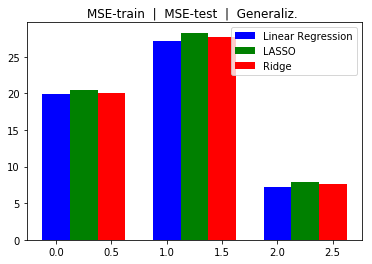

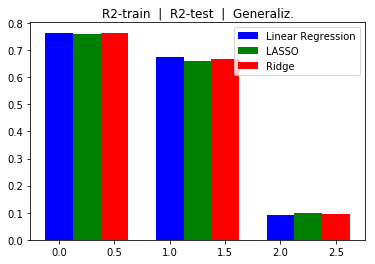

In [20]:
#scores MSE para os modelos Linear Regression, LASSO, Ridge
scores_mse = [[lr_mse_train, lr_mse_test, abs(lr_mse_train - lr_mse_test)], 
              [ls_mse_train, ls_mse_test, abs(ls_mse_train - ls_mse_test)], 
              [rg_mse_train, rg_mse_test, abs(rg_mse_train - rg_mse_test)]]

#scores R2 para os modelos Linear Regression, LASSO, Ridge
scores_r2 = [[lr_r2_train, lr_r2_test, abs(lr_r2_train - lr_r2_test)], 
             [ls_r2_train, ls_r2_test, abs(ls_r2_train - ls_r2_test)], 
             [rg_r2_train, rg_r2_test, abs(rg_r2_train - rg_r2_test)]]

#função para plotar resultados da avaliação
def plot_avaliation(data, title):
    index = np.arange(3)
    p1 = plt.bar(index + 0.00, data[0], color = 'b', width = 0.25)
    p2 = plt.bar(index + 0.25, data[1], color = 'g', width = 0.25)
    p3 = plt.bar(index + 0.50, data[2], color = 'r', width = 0.25)
    plt.title(title)
    plt.legend((p1[0], p2[0], p3[0]), ('Linear Regression', 'LASSO', 'Ridge'))
    plt.show()

#plotar MSE
plot_avaliation(scores_mse, 'MSE-train  |  MSE-test  |  Generaliz. ')
plot_avaliation(scores_r2, 'R2-train  |  R2-test  |  Generaliz.')

9) CONCLUSÕES:  
- O melhor modelo de regressão linear considerando como critério uma melhor generalização (que a divergencia entre o risco real e o risco empírico seja o menor possível) é a Regressão Linear Múltipla.
- Taxa de Erro Mínimo Quadrático: MSE = 27.1838 (conj. teste)
- Taxa de R2: R2-score = 0.6735 (conj. teste)